## Creature power averages in last years standard.
I wanted to take a look at the powers from each color in Magic the Gathering and see the range between them.
The goal was to see if there were creatures with stronger powers in one color.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt # Allows me to make the graphs.
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # Set font and plot size to be larger.
from scipy.stats import f_oneway
import scikit_posthocs as sp
import numpy as np

In [2]:
# Assinging my data of "standard" cards to magic_df
magic_df = pd.read_json('StandardCards.json')

# Placing card names as the begining of each row.
magic_df = magic_df.transpose()

In [3]:
# Replaced all instances of * in the power column. 
magic_df["power"] = magic_df["power"].replace('*', 1)

# pandas.to_numeric(arg, errors='raise', downcast=None)
# Converted all powers from string to numbers.
magic_df["power"] = pd.to_numeric(magic_df["power"])

# Placed all creatures in here.
creatures = magic_df[(magic_df["power"] >= 0)]

In [4]:
# mask = magic_df["colors"].apply(lambda val: 'W' in val) and len(val) == 1) frames = pdf1, df2, df3] anova pythonimport numpy scipy oneway! Info from professor during class Q and A.
# df1 - magic_df[mask]
# Attempting to separate creature colors.

maskW = creatures["colors"].apply(lambda val: 'W' in val and len(val) == 1)
white_creatures = creatures[maskW]


maskG = creatures["colors"].apply(lambda val: 'G' in val and len(val) == 1)
green_creatures = creatures[maskG]


maskU = creatures["colors"].apply(lambda val: 'U' in val and len(val) == 1)
blue_creatures = creatures[maskU]


maskR = creatures["colors"].apply(lambda val: 'R' in val and len(val) == 1)
red_creatures = creatures[maskR]


maskB = creatures["colors"].apply(lambda val: 'B' in val and len(val) == 1)
black_creatures = creatures[maskB]

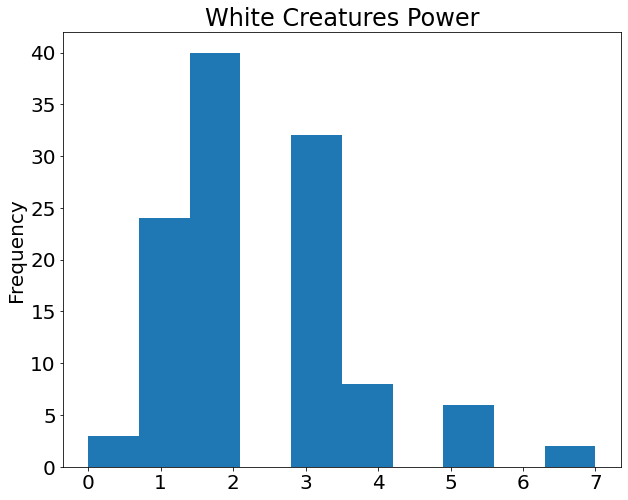

In [5]:
# White creatures power frequency (histogram).
white_creatures['power'].plot(kind='hist', title='White Creatures Power');

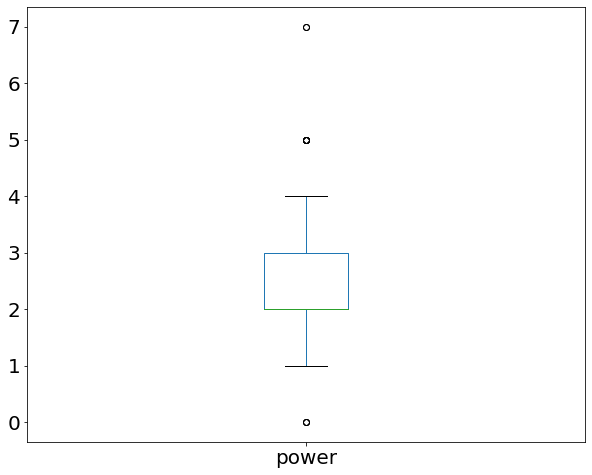

In [6]:
# White creatures power (boxplot).
white_creatures['power'].plot(kind="box");

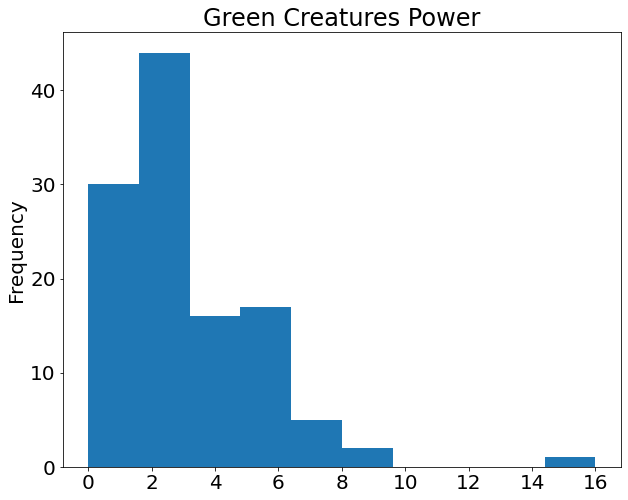

In [7]:
# Green creatures power frequency (histogram).
green_creatures['power'].plot(kind='hist', title='Green Creatures Power');

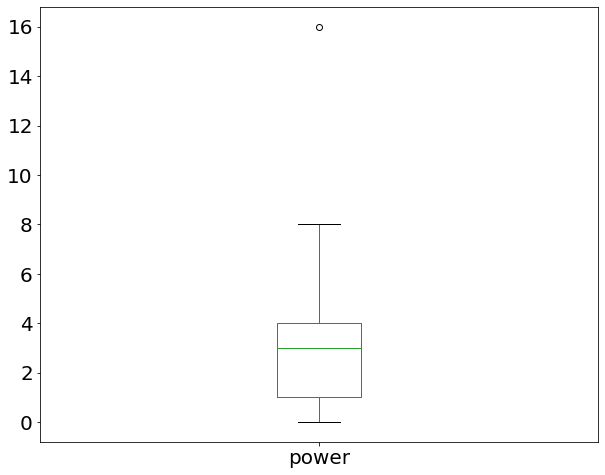

In [8]:
# Green creatures power (boxplot).
green_creatures['power'].plot(kind="box");

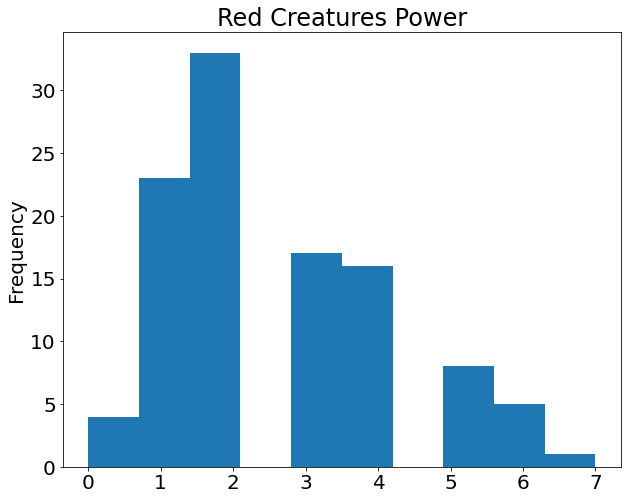

In [9]:
# Red creatures power frequency (histogram).
red_creatures['power'].plot(kind='hist', title='Red Creatures Power');

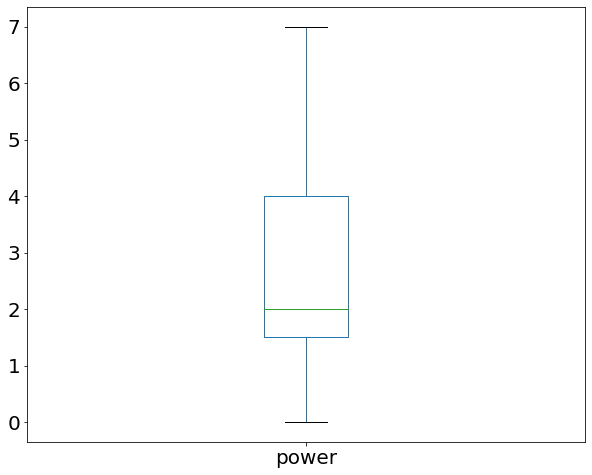

In [10]:
# Red creatures power (boxplot).
red_creatures['power'].plot(kind="box");

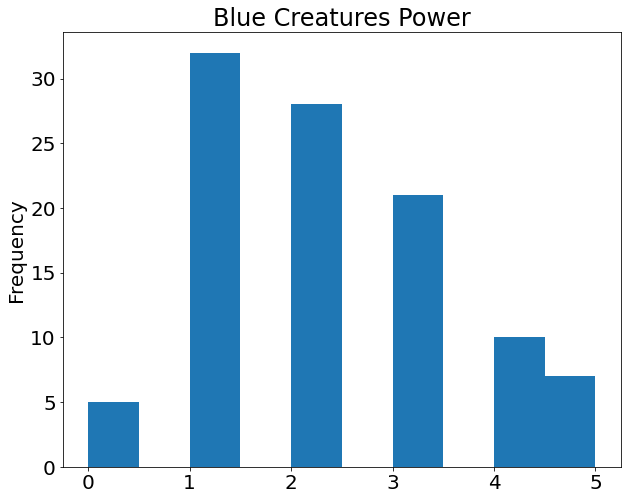

In [11]:
# Blue creatures power frequency (histogram).
blue_creatures['power'].plot(kind='hist', title='Blue Creatures Power');

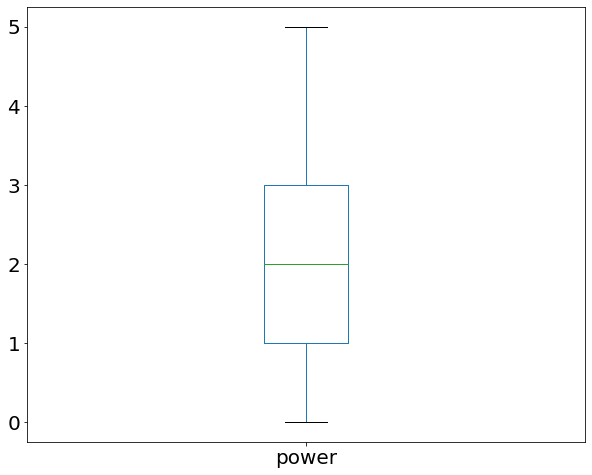

In [12]:
# Blue creatures power (boxplot).
blue_creatures['power'].plot(kind="box");

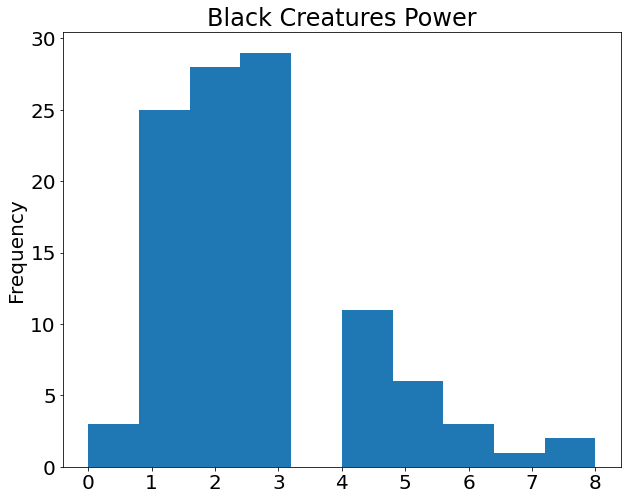

In [13]:
# Black creatures power frequency (histogram).
black_creatures['power'].plot(kind='hist', title='Black Creatures Power');

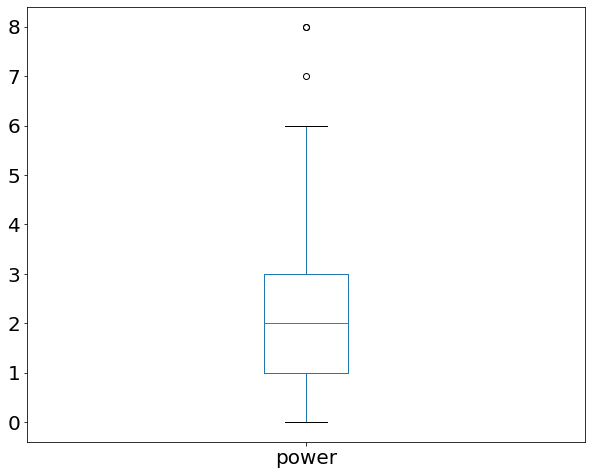

In [14]:
# Black creatures power (boxplot).
black_creatures['power'].plot(kind="box");

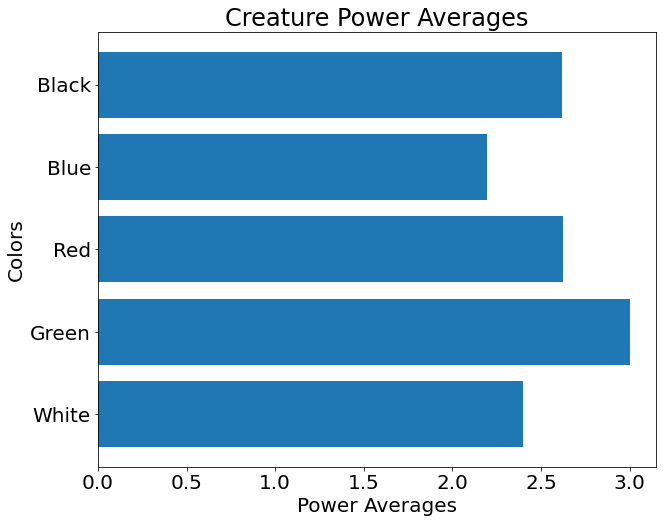

In [34]:
#https://datatofish.com/horizontal-bar-chart-matplotlib/ Where I got the information on how to create horizontal graphs.
colours = ['White', 'Green', 'Red', 'Blue', 'Black']
powers = [white_creatures['power'].mean(), green_creatures['power'].mean(), red_creatures['power'].mean(), blue_creatures['power'].mean(), black_creatures['power'].mean()]

plt.barh(colours, powers)
plt.title('Creature Power Averages')
plt.ylabel('Colors')
plt.xlabel('Power Averages')
plt.show()

## The Graphs Above
Looking at the graphs we can see that normal power ranges went from 0 3. Then we had less cards when it came to 4+ and a few extreme cases of them going above 7.
The majority of the creatures though fell between 2 - 3 when we look at the final graph that has the averages of the five colors.

In [17]:
# scipy.stats.f_oneway
F, p = f_oneway(white_creatures_powers, green_creatures_powers, red_creatures_powers, blue_creatures_powers, black_creatures_powers)
print(F)
print(p)

3.59545707330559
0.0066229033280666965


Here I tried to do some work with regression and finding the significant values, but I was not able to get the data in the format I needed
or I was unable to properly code this.

In [25]:
# Pin pointing down to the powers only
white_creatures_powers = white_creatures['power']
green_creatures_powers = green_creatures['power']
red_creatures_powers = red_creatures['power']
blue_creatures_powers = blue_creatures['power']
black_creatures_powers = black_creatures['power']

In [16]:
# Making an array out of each color.
white_array = [white_creatures_powers]
green_array = [green_creatures_powers]
red_array = [red_creatures_powers]
blue_array = [blue_creatures_powers]
black_array = [black_creatures_powers]



In [18]:
# Made each color it's own dataframe
wcp_df = pd.DataFrame(white_array)
gcp_df = pd.DataFrame(green_array)
rcp_df = pd.DataFrame(red_array)
ucp_df = pd.DataFrame(blue_array)
bcp_df = pd.DataFrame(black_array)


In [19]:
# Grabbed them all here
frames = [wcp_df, gcp_df, rcp_df, ucp_df, bcp_df]

In [20]:
# Combined them all displaying color and power as column headers and name at the beginning of row.
mashed = pd.concat(frames)

In [32]:
# Here is where I'm the most confused and don't understand how to format the data.
sp.posthoc_nemenyi_friedman(mashed)

,Acclaimed Contender,Ajani's Pridemate,Angel of Grace,Angel of Vitality,Angelic Guardian,Apostle of Purifying Light,Archon of Absolution,Archway Angel,Ardenvale Paladin,Ardenvale Tactician,...,Veiled Shade,Vengeful Warchief,"Vilis, Broker of Blood",Vindictive Vampire,Vizier of the Scorpion,Vraska's Finisher,Walking Corpse,Whispering Snitch,Wicked Guardian,Yarok's Fenlurker
Acclaimed Contender,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
Ajani's Pridemate,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
Angel of Grace,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
Angel of Vitality,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
Angelic Guardian,0.9,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vraska's Finisher,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,...,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9
Walking Corpse,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,...,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.9,0.9
Whispering Snitch,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.9
Wicked Guardian,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.9
